## Table of Contents

    1. Import libraries and data set
    2. Data cleaning
        a. Extreme values check
    3. Data prep for regression analysis
        a. Hypothesis
    4. Regression analysis
        a. Interpretation of results
        b. Comparison of regression analysis to training set

# 01. Import libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a path for easier importing
path = r'C:\Users\blim9\Desktop\Career Foundry\Data Immersion\Achievement 6\World Happiness Report'

In [4]:
# Import the last data set worked on
df = pd.read_csv(os.path.join (path, '02. Data', 'Prepared Data', 'cleaned_revised_dataset.csv'), index_col = 0)

In [5]:
df.head()

,Country,Region,Continent,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom (Life Choices),Trust (Government Corruption),Generosity (Donations to Charity),Dystopia Residual,Happiness Status
0,Switzerland,Western Europe,Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Happy country
1,Iceland,Western Europe,Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Happy country
2,Denmark,Western Europe,Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Happy country
3,Norway,Western Europe,Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Happy country
4,Canada,North America,North America,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Happy country


# 02. Data cleaning

In [6]:
# Check for missing values
df.isnull().sum()

Country                              0
Region                               0
Continent                            0
Year                                 0
Happiness Rank                       0
Happiness Score                      0
Economy (GDP per Capita)             0
Family (Social Support)              0
Health (Life Expectancy)             0
Freedom (Life Choices)               0
Trust (Government Corruption)        0
Generosity (Donations to Charity)    0
Dystopia Residual                    0
Happiness Status                     0
dtype: int64

In [7]:
# Check for duplicates
df_dup = df.duplicated()

In [8]:
df_dup.shape

(781,)

### Extreme values check

C:\Users\blim9\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

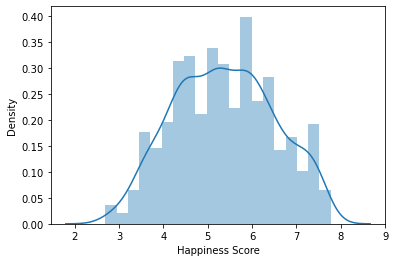

In [9]:
# Check for extreme values
sns.distplot(df['Happiness Score'], bins = 20)

In [10]:
# Check the mean 
df['Happiness Score'].mean()

5.377231754346989

In [11]:
# Check the median
df['Happiness Score'].median()

5.321

In [12]:
# Check the max 
df['Happiness Score'].max()

7.769

# 03. Data prep for regression analysis

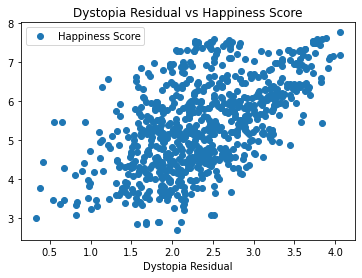

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'Dystopia Residual', y = 'Happiness Score', style ='o')
plt.title('Dystopia Residual vs Happiness Score')
plt.xlabel = 'Dystopia Score'
plt.ylabel = 'Happiness Score'
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['Dystopia Residual'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [15]:
X

array([[2.51738   ],
       [2.70201   ],
       [2.49204   ],
       [2.46531   ],
       [2.45176   ],
       [2.61955   ],
       [2.4657    ],
       [2.37119   ],
       [2.26425   ],
       [2.26646   ],
       [3.08854   ],
       [3.17728   ],
       [2.5332    ],
       [3.60214   ],
       [2.51011   ],
       [3.26001   ],
       [1.96961   ],
       [1.9757    ],
       [2.41484   ],
       [2.24743   ],
       [1.96994   ],
       [2.47489   ],
       [3.19131   ],
       [1.88501   ],
       [2.84848   ],
       [2.11569   ],
       [2.67585   ],
       [1.55674   ],
       [2.21126   ],
       [2.836     ],
       [2.67782   ],
       [2.32142   ],
       [2.85737   ],
       [2.31945   ],
       [2.43872   ],
       [2.12367   ],
       [1.6488    ],
       [2.32323   ],
       [1.87634   ],
       [2.79094   ],
       [2.26882   ],
       [3.035     ],
       [2.74255   ],
       [2.23741   ],
       [2.24639   ],
       [1.68435   ],
       [2.21978   ],
       [2.539

In [16]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [17]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Hypothesis

### If a country is classified as a 'happy country', then their 'Dystopia Residual' score is greater than 1.88.

In [18]:
# Group the Happiness Status and Happiness Score to find out what the minimum score is for a 'happy country'
df.groupby('Happiness Status').agg({'Happiness Score': ['min', 'max']})

Happiness Score       
                                 min    max
Happiness Status                           
Happy country                  6.003  7.769
Medium happy country           4.507  6.000
Unhappy country                2.693  4.500

#### Any country with a Happiness Score below 6.003 is not considered a 'happy country'

# 04. Regression analysis

In [19]:
# Create a regression object
regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [20]:
# Fit the regression to the train set
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

In [22]:
# Reload the library as Line 13 already includes plt.xlabel and plt.ylabel. Cannot label the below plot without getting an error.
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

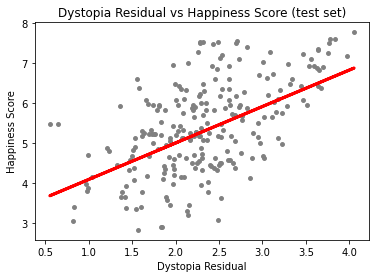

In [23]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Dystopia Residual vs Happiness Score (test set)')
plot_test.xlabel('Dystopia Residual')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.91059895]]
Mean squared error:  0.9045614368403652
R2 score:  0.30895696208844103


## Interpretation

### There is a positive slope indicating a positive relationship. This aligns with my hypothesis where happy countries have a dystopia residual score higher than 1.88. As the happiness score increases, so does the dystopia score. With a MSE of 0.90, it is rather small, but visually there are many points scattered and linear regression may not be the best type of model. In addition, a R2 score of 0.31 indicates a low score so the model isn't that great of a fit.

In [27]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,4.856235
1,6.886,6.486197
2,6.344,5.066054
3,7.119,5.470979
4,3.781,4.442622
5,4.692,4.550022
6,4.390,5.411690
7,5.061,4.953477
8,6.929,5.565172
9,5.488,5.484192


## Compare how the regression fits the training set

In [28]:
# Predict the X_train

y_predicted_train = regression.predict(X_train)

In [29]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.91059895]]
Mean squared error:  0.8488166157732958
R2 score:  0.3213459702642746


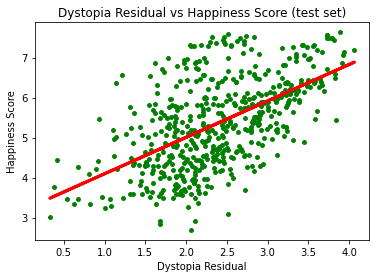

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Dystopia Residual vs Happiness Score (test set)')
plot_test.xlabel('Dystopia Residual')
plot_test.ylabel('Happiness Score')
plot_test.show()

### Comparing the model summary statistics for both the test and training sets, they are very similar. The slope is still 0.91, the MSE has a 0.6 difference, and the R2 score has a 0.2 difference, so this was not overfit. 

### There is still a lot of variance in the data points, so Dystopia Residual (as one factor), is clearly not enough to predict the Happiness Score. When comparing the predicted and actual values, they were also quite off (over or under by 1) which creates a big difference since the margin is so small.